# Sign Language Conversion to Text

**Team: 13**
Haruka George
Deeksha Joshi

**Course:** DAAN 570– Deep Learning (Spring I, 2022)

### Problem Statement

To use a deep learning model to convert American Sign Language (ASL) signed hand movements into text in order to minimize communication barriers with the hearing impaired and give a teaching aid for sign language. We will propose a solution that takes video input of the gestures, interpret each sequential frame in the input and provide an alphabet as output. The characters are joined to form a word (combination of letters) which are further combined to form a sentence. We have included the functionality of sentiment analysis by identifying the emotions of the current word to better understand the user’s opinion or attitude. 
	

### Data Collection

We're creating our own dataset because our research is built on a vision-based approach that necessitates the use of raw images. The most generally available dataset for sign language problems is in RGB format, which is incompatible with our needs. As a result, we decided to gather our own data. To create our dataset, we used the Open Computer Vision (OpenCV) library. To begin, we took roughly 1000 photos of each symbol in ASL, then divided the images into train and test in the ratio of 750:250 after gaussian blur methods

### Required packages

For our project we need below packages, we can install it using pip install package_name if it is not present in local environment:
1. tensorflow
2. matplotlib
3. keras
4. os


In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

#setting up the seed for result reprodusibility
tf.random.set_seed(100)

### Data Preprocessing

We are applying image data augmentation techniques that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset. Training deep learning neural network models on more data can result in more skilful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

Here we are doing following steps in our data preprocessing:
1. Rescale: rescaling our images by a factor of 1./255
2. shear_range: shearing transformations by a factor of 0.2
3. zoom_range: zooming by 0.2 inside pictures
4. horizontal_flip: True- for randomly flipping half of the images horizontally

Additionally, we are converting all the images to the target size (128 x 128) and setting the color mode to “grayscale”.  


In [2]:
# Data Augmentation - Generating images for the training and test set

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
# Generating Training and test set

training_set = train_datagen.flow_from_directory('final_dataSet/trainingData',                                
                                                 target_size = (128, 128),
                                                 batch_size = 10,
                                                 color_mode = 'grayscale',                                
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('final_dataSet/testingData',
                                            target_size = (128, 128),                                  
                                            batch_size = 10,        
                                            color_mode = 'grayscale',
                                            class_mode = 'categorical')

Found 19854 images belonging to 27 classes.
Found 6777 images belonging to 27 classes.


#### Outcome: We converted all the images to a size of 128x128 and different variations of the images are formed using above techniques that will make our model more robust

### Methodology

1. Explan your Deep Learning process / methodology

    Convolutional Neural Networks (CNN) model is used for image classification here. CNN or ConvNet are complex feed forward neural networks. Because of its great accuracy, CNNs are employed for image categorization and identification. The CNN uses a hierarchical model that builds a network, similar to a funnel, and then outputs a fully-connected layer in which all neurons are linked to each other and the output is processed.


2. Introduce the Deep Neural Networks you used in your project
 * Model 1
   Single layers of Conv2D, MaxPooling, Flatten, Dense with dropout is taken as baseline model 
 
 * Model 2
   Three Conv2D Layers are used, with 16 filters each of 3x3 size for each layer with padding as “same”. 
   Three layers of MaxPooling is used with 16 filters each of 2x2 size for each layer with padding as “valid”. 
   Three Dense layers with 128, 96 and 64 neurons each, along with output Dense layer with 27 neurons. 
   Dropout of 0.4 is applied to first and second Dense layers. 


3. Keywords: supervised learning, sentiment analysis, multi-class classification,natural language processing



## Baseline model (Model 1)

In [4]:
# creating model and adding layers

b_model = tf.keras.models.Sequential()

b_model.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

b_model.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))


# Flatten the output

b_model.add(tf.keras.layers.Flatten())

# Adding dense layer and dropout to avoid overfitting 

b_model.add(tf.keras.layers.Dense(units=128, activation='relu'))
b_model.add(tf.keras.layers.Dropout(0.40))
b_model.add(tf.keras.layers.Dense(units=27, activation='softmax')) 

In [5]:
b_model.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

b_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 27)                3483      
                                                        

### Model Fitting and Validation (Model 1)

In [6]:
history = b_model.fit(training_set,
                  epochs = 10,
                  validation_data = test_set,
                  verbose = 1)

Epoch 1/10
1986/1986 [==============================] - 458s 230ms/step - loss: 3.0964 - accuracy: 0.0987 - val_loss: 1.6168 - val_accuracy: 0.5687
Epoch 2/10
1986/1986 [==============================] - 348s 175ms/step - loss: 1.1126 - accuracy: 0.6394 - val_loss: 1.1554 - val_accuracy: 0.7648
Epoch 3/10
1986/1986 [==============================] - 342s 172ms/step - loss: 0.6005 - accuracy: 0.7995 - val_loss: 0.9958 - val_accuracy: 0.8358
Epoch 4/10
1986/1986 [==============================] - 341s 172ms/step - loss: 0.4210 - accuracy: 0.8588 - val_loss: 1.2512 - val_accuracy: 0.8254
Epoch 5/10
1986/1986 [==============================] - 342s 172ms/step - loss: 0.3119 - accuracy: 0.8970 - val_loss: 1.2463 - val_accuracy: 0.8635
Epoch 6/10
1986/1986 [==============================] - 339s 171ms/step - loss: 0.2569 - accuracy: 0.9132 - val_loss: 1.3576 - val_accuracy: 0.8704
Epoch 7/10
1986/1986 [==============================] - 345s 174ms/step - loss: 0.2035 - accuracy: 0.9332 - val_

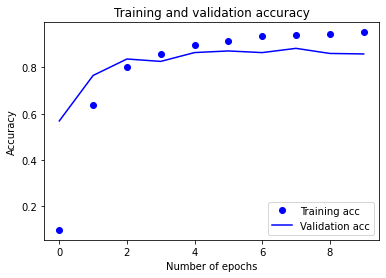

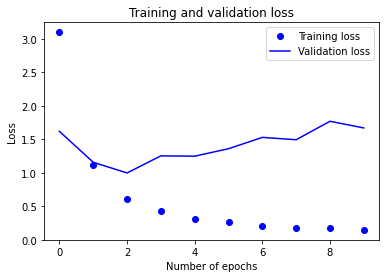

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.show()

#### Interpretation: 
    The graph shows us that there is major overfitting which tells us this model has high variance which is evident through the training and validation loss plot. 

### Model Evaluation 

In [8]:
test_loss, test_acc = b_model.evaluate(test_set, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 1s 26ms/step - loss: 1.9579 - accuracy: 0.8100
test acc: 0.8100000023841858


#### Result:
    The model give us an accuracy of 81% which is not satisfactory for our problem statement.

## Our model (Model 2)

In [9]:
# creating model and adding layers

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[128, 128, 1]))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=16, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=16, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))

# Flatten the output

model.add(tf.keras.layers.Flatten())

# Adding dense layer and dropout to avoid overfitting 

model.add(tf.keras.layers.Dense(units=128, 
                                     activation='relu'))
model.add(tf.keras.layers.Dropout(0.40))
model.add(tf.keras.layers.Dense(units=96, activation='relu'))
model.add(tf.keras.layers.Dropout(0.40))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=27, activation='softmax')) 

In [10]:
model.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)      

### Model Fitting and Validation (Model 2)

In [11]:
history = model.fit(training_set,
                  epochs = 10,
                  validation_data = test_set,
                  verbose = 1)

Epoch 1/10
1986/1986 [==============================] - 170s 85ms/step - loss: 1.5258 - accuracy: 0.5177 - val_loss: 0.5956 - val_accuracy: 0.8558
Epoch 2/10
1986/1986 [==============================] - 183s 92ms/step - loss: 0.5090 - accuracy: 0.8288 - val_loss: 0.5189 - val_accuracy: 0.9044
Epoch 3/10
1986/1986 [==============================] - 166s 83ms/step - loss: 0.3253 - accuracy: 0.8935 - val_loss: 0.4318 - val_accuracy: 0.9284
Epoch 4/10
1986/1986 [==============================] - 164s 83ms/step - loss: 0.2321 - accuracy: 0.9239 - val_loss: 0.5193 - val_accuracy: 0.9245
Epoch 5/10
1986/1986 [==============================] - 376s 190ms/step - loss: 0.2013 - accuracy: 0.9355 - val_loss: 0.4786 - val_accuracy: 0.9125
Epoch 6/10
1986/1986 [==============================] - 200s 101ms/step - loss: 0.1594 - accuracy: 0.9487 - val_loss: 0.3765 - val_accuracy: 0.9374
Epoch 7/10
1986/1986 [==============================] - 192s 97ms/step - loss: 0.1492 - accuracy: 0.9532 - val_loss:

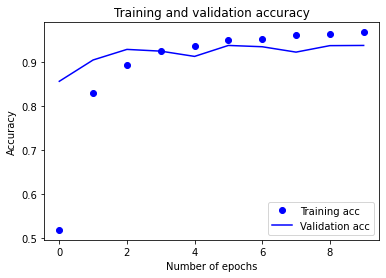

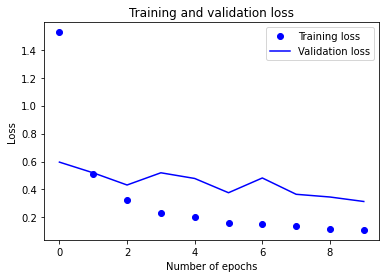

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.show()

#### Interpretations of plots:
    The graph shows us that there is not major overfitting or underfitting which tells us our model does not have high variance or bias. 

### Model Evaluation 

In [13]:
test_loss, test_acc = model.evaluate(test_set, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 1s 16ms/step - loss: 0.3217 - accuracy: 0.9380
test acc: 0.9380000233650208


#### Result:
    We have achieved an accuracy of almost 94%  on the test data using our model which gives us a good performing model

### Saving model:
We are saving our model architecture and weights into json and h5 file format respectively for convenient usage in our final application.

In [14]:
model_json = model.to_json()
with open("model_file.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model_wt.h5')
print('Weights saved')

Model Saved
Weights saved


### Issues / Improvements

**ISSUES:

1. There are no large, general data sets available that could aid in the development of generic, more accurate statistical or neural machine translation models for natural to sign language translation
2. There are numerous sign languages, each with a large range of signs that varies somewhat in hand shape, motion, and position.
3. The current mechanisms used to translate sign language words require large sets of additional data for each extra word it can identify
4. The transmission of sign language presents extra obstacles. The existence of quick motion and the need for smooth motion perception are both depicted in the video depicting a sequence of indicators

**IMPROVEMENTS:

1. The model can be enhanced by adding the functionality of predicting the sentiment for entire sentences, it is one of the future scopes of the project
2. Furthermore, even in the case of complex backgrounds, greater accuracy can be attained by experimenting with different background subtraction techniques
3. For the model, a web or mobile application can be developed so that it is easily accessible regardless of device type or location

###  References

1.	Adaloglou, Nikolaos M., et al. "A comprehensive study on deep learning-based methods for sign language recognition." IEEE Transactions on Multimedia (2021).
2.	Konstantinidis, Dimitrios, Kosmas Dimitropoulos, and Petros Daras. "A deep learning approach for analyzing video and skeletal features in sign language recognition." 2018 IEEE international conference on imaging systems and techniques (IST). IEEE, 2018.
3.	Ojha, Ankit, et al. "Sign language to text and speech translation in real time using convolutional neural network." NCAIT 8.15 (2020).
4.	A. Sharma, S. Panda and S. Verma, "Sign Language to Speech Translation," 2020 11th International Conference on Computing, Communication and Networking Technologies (ICCCNT), 2020, pp. 1-8, doi: 10.1109/ICCCNT49239.2020.9225422.
5.	L. Fernandes, P. Dalvi, A. Junnarkar and M. Bansode, "Convolutional Neural Network based Bidirectional Sign Language Translation System," 2020 Third International Conference on Smart Systems and Inventive Technology (ICSSIT), 2020, pp. 769-775, doi: 10.1109/ICSSIT48917.2020.9214272.
6.	K. Bantupalli and Y. Xie, "American Sign Language Recognition using Deep Learning and Computer Vision," 2018 IEEE International Conference on Big Data (Big Data), 2018, pp. 4896-4899, doi: 10.1109/BigData.2018.8622141.

	

### Credits

-	https://github.com/harshbg/Sign-Language-Interpreter-using-Deep-Learning
-	https://github.com/alvinwan/sign-language-translator
